#### 나비와 나방 분류
> https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species  
> 224 X 224 X 3

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

model = VGG16()
image = load_img('./datasets/butterfly_moth/train/ADONIS/033.jpg', target_size=(224, 224))
image = img_to_array(image)

# 불러온 이미지의 차원을 1차수 늘려준다. 4차원으로.
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
target = decode_predictions(prediction)
print(target)

# 가장 높은 하나의 답만 출력할 때
print(target[0][0])
# 답의 이름과 확률을 출력할 때
print(target[0][0][1], f'{np.round(target[0][0][2] * 100, 4)}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
[[('n02281787', 'lycaenid', 0.91267484), ('n02277742', 'ringlet', 0.085335344), ('n02281406', 'sulphur_butterfly', 0.0014852062), ('n02280649', 'cabbage_butterfly', 0.00038155913), ('n02268443', 'dragonfly', 4.8636262e-05)]]
('n02281787', 'lycaenid', 0.91267484)
lycaenid 91.2675%


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import Xception, decode_predictions

model = Xception()
image = load_img('./datasets/butterfly_moth/train/ADONIS/033.jpg', target_size=(299, 299))
image = img_to_array(image)

# 불러온 이미지의 차원을 1차수 늘려준다. 4차원으로.
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
target = decode_predictions(prediction)
print(target)

# 가장 높은 하나의 답만 출력할 때
print(target[0][0])
# 답의 이름과 확률을 출력할 때
print(target[0][0][1], f'{np.round(target[0][0][2] * 100, 4)}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
[[('n03775546', 'mixing_bowl', 1.0), ('n04127249', 'safety_pin', 2.87333e-34), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
('n03775546', 'mixing_bowl', 1.0)
mixing_bowl 100.0%


- VGG모델이 유사도는 높지만 실제로 모델을 훈련하였을 때 정확도가 처참하여 유사도가 낮아도 Xception 모델을 사용하여 진행하였다.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 112
BATCH_SIZE = 64

train_dir = './datasets/butterfly_moth/train'
validation_dir = './datasets/butterfly_moth/valid'
test_dir = './datasets/butterfly_moth/test'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ARCIGERA FLOWER MOTH': 5, 'ATALA': 6, 'ATLAS MOTH': 7, 'BANDED ORANGE HELICONIAN': 8, 'BANDED PEACOCK': 9, 'BANDED TIGER MOTH': 10, 'BECKERS WHITE': 11, 'BIRD CHERRY ERMINE MOTH': 12, 'BLACK HAIRSTREAK': 13, 'BLUE MORPHO': 14, 'BLUE SPOTTED CROW': 15, 'BROOKES BIRDWING': 16, 'BROWN ARGUS': 17, 'BROWN SIPROETA': 18, 'CABBAGE WHITE': 19, 'CAIRNS BIRDWING': 20, 'CHALK HILL BLUE': 21, 'CHECQUERED SKIPPER': 22, 'CHESTNUT': 23, 'CINNABAR MOTH': 24, 'CLEARWING MOTH': 25, 'CLEOPATRA': 26, 'CLODIUS PARNASSIAN': 27, 'CLOUDED SULPHUR': 28, 'COMET MOTH': 29, 'COMMON BANDED AWL': 30, 'COMMON WOOD-NYMPH': 31, 'COPPER TAIL': 32, 'CRECENT': 33, 'CRIMSON PATCH': 34, 'DANAID EGGFLY': 35, 'EASTERN COMA': 36, 'EASTERN DAPPLE WHITE': 37, 'EASTERN PINE ELFIN': 38, 'ELBOWED PIERROT': 39,

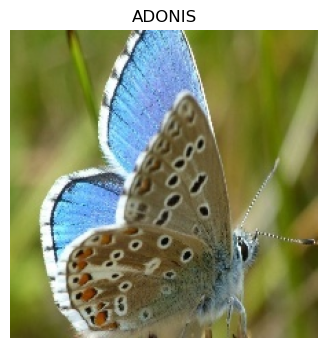

In [4]:
import cv2
import matplotlib.pyplot as plt

file_index = 100

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[file_index]), cv2.COLOR_BGR2RGB)


def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.title(train_generator.filepaths[file_index].split('\\')[1])
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [5]:
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'ADONIS',
 1: 'AFRICAN GIANT SWALLOWTAIL',
 2: 'AMERICAN SNOOT',
 3: 'AN 88',
 4: 'APPOLLO',
 5: 'ARCIGERA FLOWER MOTH',
 6: 'ATALA',
 7: 'ATLAS MOTH',
 8: 'BANDED ORANGE HELICONIAN',
 9: 'BANDED PEACOCK',
 10: 'BANDED TIGER MOTH',
 11: 'BECKERS WHITE',
 12: 'BIRD CHERRY ERMINE MOTH',
 13: 'BLACK HAIRSTREAK',
 14: 'BLUE MORPHO',
 15: 'BLUE SPOTTED CROW',
 16: 'BROOKES BIRDWING',
 17: 'BROWN ARGUS',
 18: 'BROWN SIPROETA',
 19: 'CABBAGE WHITE',
 20: 'CAIRNS BIRDWING',
 21: 'CHALK HILL BLUE',
 22: 'CHECQUERED SKIPPER',
 23: 'CHESTNUT',
 24: 'CINNABAR MOTH',
 25: 'CLEARWING MOTH',
 26: 'CLEOPATRA',
 27: 'CLODIUS PARNASSIAN',
 28: 'CLOUDED SULPHUR',
 29: 'COMET MOTH',
 30: 'COMMON BANDED AWL',
 31: 'COMMON WOOD-NYMPH',
 32: 'COPPER TAIL',
 33: 'CRECENT',
 34: 'CRIMSON PATCH',
 35: 'DANAID EGGFLY',
 36: 'EASTERN COMA',
 37: 'EASTERN DAPPLE WHITE',
 38: 'EASTERN PINE ELFIN',
 39: 'ELBOWED PIERROT',
 40: 'EMPEROR GUM MOTH',
 41: 'GARDEN TIGER MOTH',
 42: 'GIANT LEOPARD MOTH',
 43: 'GLITTER

In [6]:
train_target_names = []
for target in train_generator.classes:
    train_target_names.append(target_name[target])

valid_target_names = []
for target in validation_generator.classes:
    valid_target_names.append(target_name[target])

test_target_names = []
for target in test_generator.classes:
    test_target_names.append(target_name[target])

In [7]:
import pandas as pd

train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': train_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': valid_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/')) 

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

train_df

,file_paths,target_names,targets
0,./datasets/butterfly_moth/train/ADONIS/001.jpg,ADONIS,0
1,./datasets/butterfly_moth/train/ADONIS/002.jpg,ADONIS,0
2,./datasets/butterfly_moth/train/ADONIS/003.jpg,ADONIS,0
3,./datasets/butterfly_moth/train/ADONIS/004.jpg,ADONIS,0
4,./datasets/butterfly_moth/train/ADONIS/005.jpg,ADONIS,0
...,...,...,...
12589,./datasets/butterfly_moth/train/ZEBRA LONG WIN...,ZEBRA LONG WING,99
12590,./datasets/butterfly_moth/train/ZEBRA LONG WIN...,ZEBRA LONG WING,99
12591,./datasets/butterfly_moth/train/ZEBRA LONG WIN...,ZEBRA LONG WING,99
12592,./datasets/butterfly_moth/train/ZEBRA LONG WIN...,ZEBRA LONG WING,99


In [8]:
train_df.targets.value_counts()

targets
65    187
48    176
17    169
16    165
88    152
     ... 
99    104
34    103
59    103
97    102
87    100
Name: count, Length: 100, dtype: int64

In [9]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(12594, 3)
(500, 3)
(500, 3)


In [85]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 112
BATCH_SIZE = 32

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # 에포크 종료 시, 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__()는 전체 데이터 건수에서 batch_size 단위로 나눈 데이터 수
    # 예를 들어, 1000개의 데이터를 30 batch_size로 설정하면, 1 batch당 33.33..개이다.
    # 이 때, 소수점은 무조건 올려서 33 + 1 = 34개로 설정한다.
    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [86]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

# train 데이터의 파일 경로를 리스트로 담아줌
train_file_paths = train_df['file_paths'].values
# target을 get_dummies를 통해 원핫인코딩
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

# aug = A.Compose([
#     A.VerticalFlip(p=0.5),
#     A.HorizontalFlip(p=0.5)
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE,
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

In [87]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(100, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [88]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)   │ (None, 112, 112, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 55, 55, 32)        │             864 │ input_layer_27[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 55, 55, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 55, 55, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 53, 53, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 53, 53, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 53, 53, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 53, 53, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 53, 53, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 53, 53, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 53, 53, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 53, 53, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_64 (Conv2D)            │ (None, 27, 27, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 27, 27, 128)       │               

 Total params: 20,969,030 (79.99 MB)

 Trainable params: 20,914,502 (79.78 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [90]:
import gc

# 메모리 해제 함수
gc.collect()

3662

In [91]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - acc: 0.0848 - loss: 4.1734 - val_acc: 0.3940 - val_loss: 7.6285 - learning_rate: 0.0010
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 801s 2s/step - acc: 0.4690 - loss: 2.0388 - val_acc: 0.6940 - val_loss: 1.3805 - learning_rate: 0.0010
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 804s 2s/step - acc: 0.6502 - loss: 1.2585 - val_acc: 0.7780 - val_loss: 1.3107 - learning_rate: 0.0010
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 789s 2s/step - acc: 0.7378 - loss: 0.9607 - val_acc: 0.8260 - val_loss: 0.6783 - learning_rate: 0.0010
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 843s 2s/step - acc: 0.7793 - loss: 0.7527 - val_acc: 0.8020 - val_loss: 1.1521 - learning_rate: 0.0010
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 856s 2s/step - acc: 0.8072 - loss: 0.7045 - val_acc: 0.8520 - val_loss: 0.6139 - learning_rate: 0.0010
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - acc: 0.8312 - loss: 0.5673 - val_acc: 0.8620 - val_loss: 0.5827 - learning_rate: 0.0010

In [108]:
model.layers

[<InputLayer name=input_layer_27, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <BatchNormalization name=block1_conv1_bn, built=True>,
 <Activation name=block1_conv1_act, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <BatchNormalization name=block1_conv2_bn, built=True>,
 <Activation name=block1_conv2_act, built=True>,
 <SeparableConv2D name=block2_sepconv1, built=True>,
 <BatchNormalization name=block2_sepconv1_bn, built=True>,
 <Activation name=block2_sepconv2_act, built=True>,
 <SeparableConv2D name=block2_sepconv2, built=True>,
 <BatchNormalization name=block2_sepconv2_bn, built=True>,
 <Conv2D name=conv2d_64, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <BatchNormalization name=batch_normalization_64, built=True>,
 <Add name=add_192, built=True>,
 <Activation name=block3_sepconv1_act, built=True>,
 <SeparableConv2D name=block3_sepconv1, built=True>,
 <BatchNormalization name=block3_sepconv1_bn, built=True>,
 <Activation name=block3_sepconv2_act, bu

In [112]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras import layers

IMAGE_SIZE = 112
BATCH_SIZE = 32

def fine_tune(datas, model_name, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=preprocess, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=preprocess)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:14]:
        layer.trainable = False
    
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [113]:
import gc

# 메모리 해제 함수
gc.collect()

19073

In [114]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

model, history = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'xception', 
          xception_preprocess_input)

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)   │ (None, 112, 112, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 55, 55, 32)        │             864 │ input_layer_32[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 55, 55, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 55, 55, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 53, 53, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 53, 53, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 53, 53, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 53, 53, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 53, 53, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 53, 53, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 53, 53, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 53, 53, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_84 (Conv2D)            │ (None, 27, 27, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 27, 27, 128)       │               

 Total params: 20,969,030 (79.99 MB)

 Trainable params: 20,914,502 (79.78 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 232s 574ms/step - acc: 0.0533 - loss: 4.4227 - val_acc: 0.4160 - val_loss: 2.7263
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 201s 511ms/step - acc: 0.2300 - loss: 3.1401 - val_acc: 0.5880 - val_loss: 1.9025
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 218s 554ms/step - acc: 0.3112 - loss: 2.6322 - val_acc: 0.6300 - val_loss: 1.5700
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 205s 519ms/step - acc: 0.3572 - loss: 2.4076 - val_acc: 0.6620 - val_loss: 1.4017
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 210s 533ms/step - acc: 0.3877 - loss: 2.2780 - val_acc: 0.6840 - val_loss: 1.3471
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 218s 553ms/step - acc: 0.4017 - loss: 2.1811 - val_acc: 0.6860 - val_loss: 1.2624
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 196s 497ms/step - acc: 0.4101 - loss: 2.1237 - val_acc: 0.6980 - val_loss: 1.2131
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 195s 494ms/step - acc: 0.4169 - loss: 2.0843 - val_acc: 0.7220 - val_loss: 1.1666
Epoch 9/10
394/394 ━━━━━

In [115]:
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - acc: 0.8921 - loss: 0.3569


[0.3860733211040497, 0.8859999775886536]

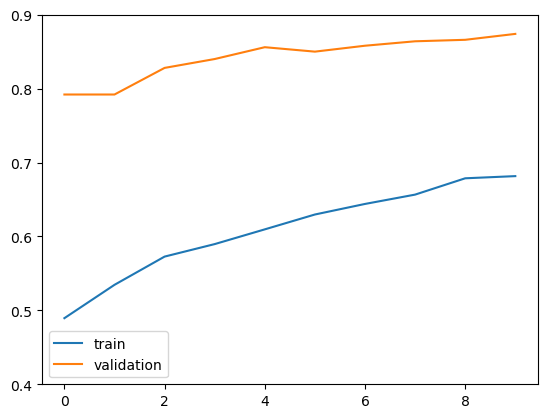

In [117]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.ylim(0.4, 0.9)
plt.legend()

- 미세조정 후 확실히 속도가 빨라지긴 하였지만, 해당 모델에 유사도가 없다시피 한 데이터이다보니 정확도는 낮은 모습을 보인다.
- 왜인지 모르겠지만 검증데이터와 테스트 데이터의 정확도가 아주 높다.
- 따라서 test 이미지를 통해 predict하여 직접 확인해보았다.

In [118]:
def preprocessing_scaling_for_train(image, mode='tf'):
    aug = A.Compose([A.HorizontalFlip(p=0.5), 
                     A.VerticalFlip(p=0.5), 
                     A.OneOf([A.ColorJitter(p=1), 
                              A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)], 
                             p=1)], p=0.5)
    image = aug(image=image)['image']
    
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

### **사진 주의**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


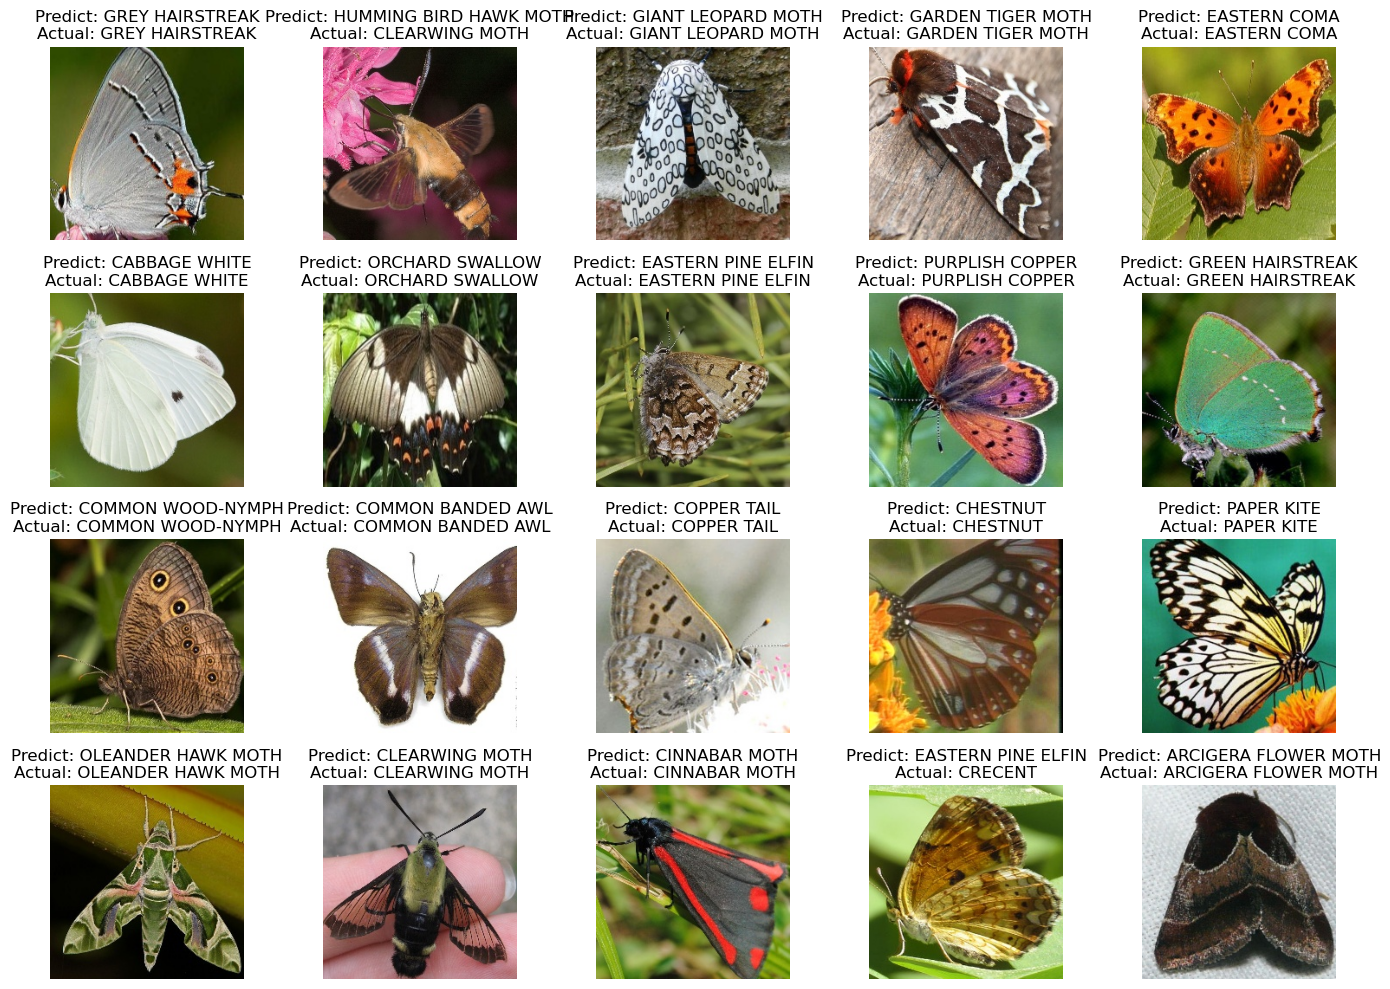

In [122]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as A

IMAGE_DIR = './datasets/butterfly_moth/test/'
class_names = train_df.target_names.unique().tolist()

def load_random_images(image_dir, class_names, num_images=20):
    selected_classes = random.choices(class_names, k=num_images)
    images = []
    labels = []
    
    for class_name in selected_classes:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        selected_image = random.choice(all_images)
        images.append(selected_image)
        labels.append(class_name)
    
    return images, labels

def preprocess_image(image_path, image_size, mode='torch'):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    preprocessed_image = preprocessing_scaling(resized_image, mode=mode)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    return preprocessed_image

random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

plt.figure(figsize=(14, 10))

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE, mode='torch')
    predictions = model.predict(preprocessed_image)
    # print(predictions[0])
    predicted_index = np.argmax(predictions[0])
    # predicted_class = int(predictions[0][0] < 0.5)

    # print(predicted_index)
    # print(class_names)
    
    predicted_class_name = class_names[predicted_index]
    
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, idx + 1)
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}\nActual: {random_labels[idx]}")
    plt.axis('off')

# print(class_names)
plt.tight_layout()
plt.show()

- 정확도에 비해 predict 결과는 아주 좋았다. 100종의 나비와 나방이 있는데도 불구하고 아주 잘 분류한 모습이다.
- 각 개체마다 특성이 명확한편이라 그런듯 하다.